# LIBRA and the Liquid Immersion Blanket
## 1L BABY
- Wall permeation
- FLiBe handing (ClLiF)
- Wall materials
- Tritium probe 

In [1]:
import math
import openmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap
import helpers
from openmc_model import baby_model

### Geometry

In [2]:
model = baby_model()
geometry = model.geometry

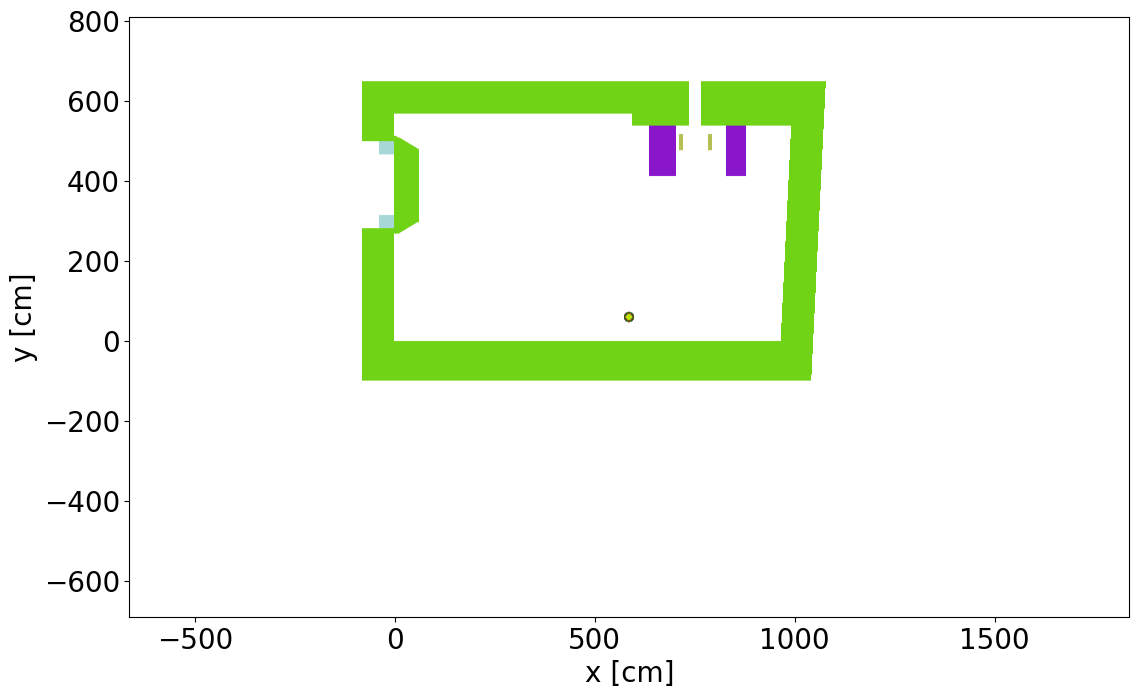

In [3]:
# Visualization

from libra_toolbox.neutronics.vault import Air
from openmc_model import air

x_c = 587
y_c = 60
z_c = 100
ax = geometry.plot(
    width=(2500, 1500),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

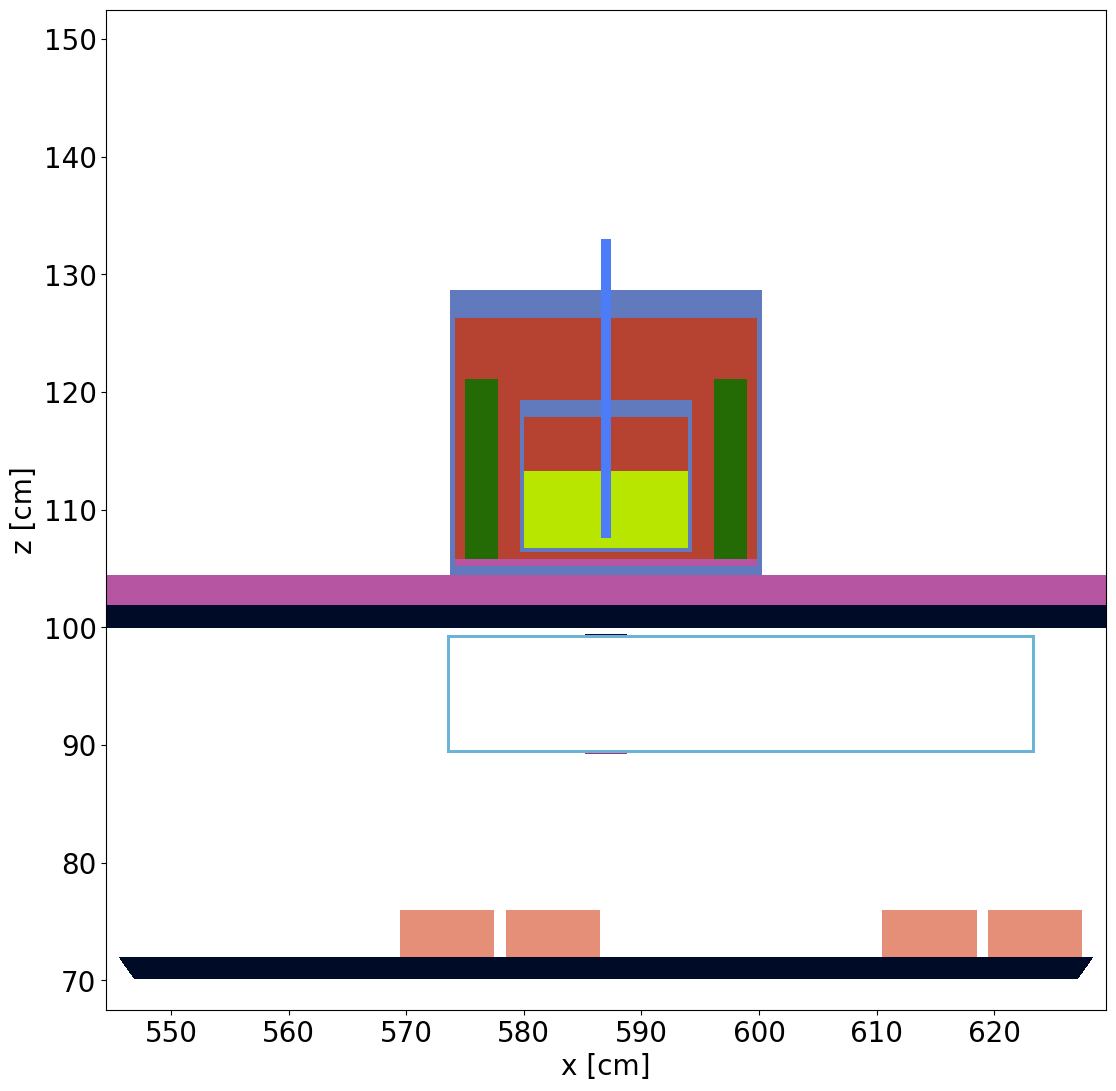

In [4]:
ax = geometry.plot(
    width=(85, 85),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xz",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

### Result

In [5]:
sp = openmc.StatePoint("statepoint.100.h5")
tbr_withvault = sp.get_tally(name="TBR").get_pandas_dataframe()
print(f"TBR: {tbr_withvault['mean'].sum() :.6e}\n")
print(f"TBR std. dev.: {tbr_withvault['std. dev.'].sum() :.6e}\n")
lithium_6_contribution = tbr_withvault[tbr_withvault['nuclide'] == 'Li6']['mean'].sum()
lithium_7_contribution = tbr_withvault[tbr_withvault['nuclide'] == 'Li7']['mean'].sum()
print(f"The tritium breeding by lithium 6 is: {lithium_6_contribution :.6e}")
print(f"The tritium breeding by lithium 7 is: {lithium_7_contribution :.6e}")

TBR: 1.985890e-03

TBR std. dev.: 1.067453e-05

The tritium breeding by lithium 6 is: 6.339905e-04
The tritium breeding by lithium 7 is: 1.351899e-03


In [6]:
tbr_mesh_result = sp.get_tally(name="UM_TBR")
unstructured_mesh = sp.meshes[1]
mean_data = np.squeeze(tbr_mesh_result.mean)  
std_dev_data = np.squeeze(tbr_mesh_result.std_dev)  

unstructured_mesh.write_data_to_vtk(
    filename="um_tbr.vtk",
    datasets={"mean": mean_data, 
              "std_dev": std_dev_data},
)